In [88]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from api_credentials import client_id, client_secret
from functions import fetch_and_display_playlist_info, load_data_and_create_df
import json

# Load playlists from JSON file
with open('playlists.json', 'r') as file:
    playlists_dict = json.load(file)

# Initialise the Spotify client with client credentials for public data access
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

import logging
# Configure logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s')


In [2]:
# New Music Friday AU & NZ playlist 
playlist_id = '37i9dQZF1DWT2SPAYawYcO'

**TL;DR:** Extract all songs in the New Music Friday AU & NZ playlist. Then using all those unique track_id's, find which other playlists (from `playlists.json`) contain that track_id and what position it is in.

**Fetches and Displays Information About Tracks in a Specific Playlist and Their Positions in Various Playlists**

This function executes multiple steps to collect and display data:

1. **Fetch Playlist Tracks:** Utilizes `fetch_playlist_tracks` to retrieve track IDs, artist names, track names, and followers count for a given playlist ID. This involves Spotify API communication to return relevant data.

2. **Get Track Positions in Playlists:** With `get_tracks_positions_in_playlists`, it fetches tracks' positions across playlists defined in `playlists_dict`. This step queries Spotify API for each track's presence and position in these playlists.

3. **Prepare Data for DataFrame Creation:**
    - Prepares data by creating a list of dictionaries, each representing a track with its artist name, track title, and positions in playlists. Tracks not appearing in some playlists receive empty strings as values.
    - For each track in `track_positions`, initializes a new row with empty strings for each playlist, adds the artist's name and track title, and includes the track's position(s) in playlists. Positions are adjusted for zero-based indexing (`pos + 1`) and combined into a single comma-separated string.

4. **Convert List of Dictionaries to DataFrame:** Converts the prepared data into a pandas DataFrame, structured with 'Artist' and 'Track' followed by each playlist column. This DataFrame is designed for tabular display of each track's position across the specified playlists.

**Parameters:**

- `sp`: Spotify client instance for Spotify API communication.
- `playlists_dict`: Maps playlist names to Spotify IDs, identifying playlists for position checks.
- `playlist_id`: Spotify ID for the playlist being queried.

**Returns:**

- `df`: pandas DataFrame with track information and positions across playlists.


In [3]:
df = fetch_and_display_playlist_info(sp, playlists_dict, playlist_id)
df.head()

2024-02-17 22:02:13,683 - INFO - Fetching playlist: 37i9dQZF1DWT2SPAYawYcO
2024-02-17 22:02:14,866 - INFO - Fetched 84 items, increasing offset to 84.


,Artist,Track,Top 50 Australia,New Music Friday AU & NZ,Hot Hits Australia,Front Left,A1,Dance Generation,Get Popped!,R&B Connect,...,Breaking Hits,Chilled Hits,Vibe Check,crush,the hybrid,Just Chill,Morning Motivation,Lazy Sunday,Today's Top Hits,Singled Out
0,Beyoncé,TEXAS HOLD 'EM,NaN,1,10,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,1
1,Dua Lipa,Training Season,35,2,3,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
2,Royel Otis,Foam,NaN,3,NaN,11,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"KUČKA, Flume",One More Night,NaN,4,NaN,NaN,NaN,19,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Cosmo's Midnight, Franc Moody",Fantasy (feat. Franc Moody),NaN,5,NaN,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Store total adds in a dictionary. Playlist Name as keys, number of new songs added to that playlist as the values

In [45]:
columns = df.columns[2:]
adds_dict = {}

for column in columns:
    adds_number = len(df[columns]) - df[column].isna().sum()
    adds_dict[column] = adds_number
    
    
# Sort the dictionary by values
sorted_adds_dict = dict(sorted(adds_dict.items(), key=lambda item: item[1], reverse=False))

print(sorted_adds_dict)


{'Get Popped!': 0, "triple j's New Music Hitlist": 0, 'POP EDGE': 0, 'come thru': 0, 'Chilled Hits': 0, 'Vibe Check': 0, 'crush': 0, 'Just Chill': 0, 'Morning Motivation': 0, 'Lazy Sunday': 0, 'Top 50 Australia': 1, 'R&B Feels': 1, 'the hybrid': 1, 'Singled Out': 1, 'Hot Hits Australia': 2, 'The Flavour': 2, "Today's Top Hits": 2, "Beats n' Bars": 3, 'Rock Out.': 3, 'Breaking Hits': 3, 'A1': 4, 'Fresh Country': 4, 'Mellow Styles': 4, 'R&B Connect': 5, 'Alt Here': 6, 'Dance Generation': 7, 'Front Left': 10, "Pop n' Fresh": 11, 'New Dance Beats': 12, 'The Drip': 12, 'Indie Arrivals': 21, 'New Music Friday AU & NZ': 84}


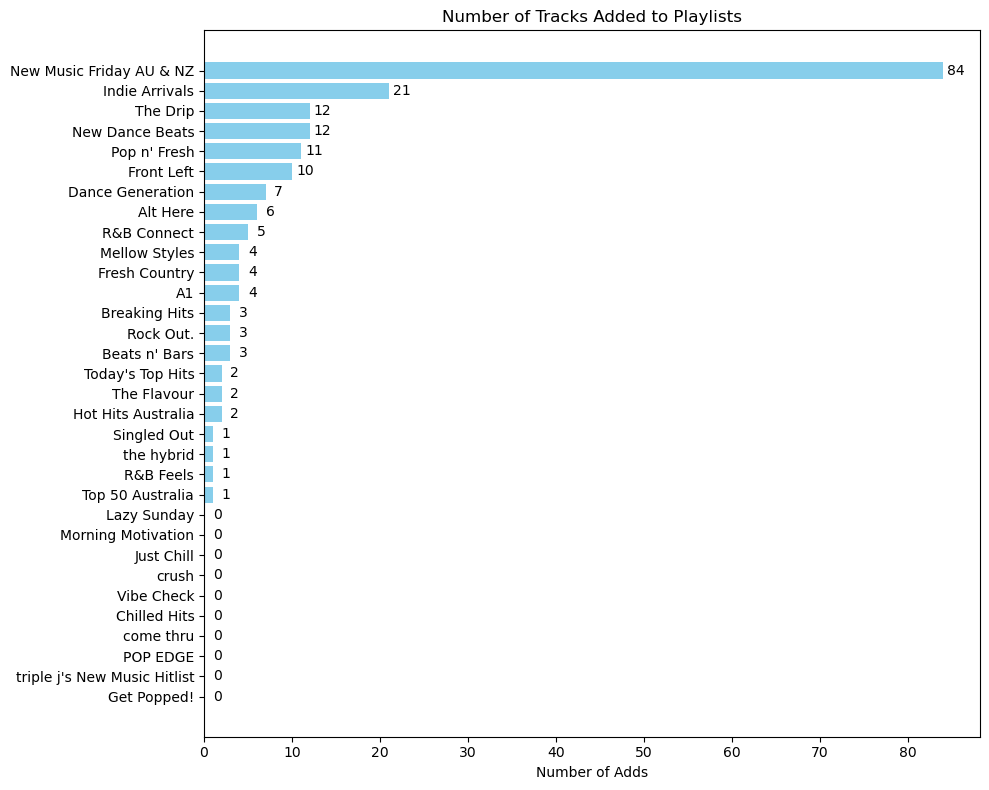

In [46]:
playlists = list(sorted_adds_dict.keys())
adds = list(sorted_adds_dict.values())

plt.figure(figsize=(10, 8))

# Enhanced Bar Chart with additional styling
bars = plt.barh(playlists, adds, color='skyblue')
plt.xlabel('Number of Adds')
plt.title('Number of Tracks Added to Playlists')

# Adding value labels to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1.5, bar.get_y() + bar.get_height()/2, 
             f'{width}', ha='center', va='center')

plt.tight_layout()
plt.show()


## Calculate Playlist Adds by Artist

In [82]:
# Function to loop through each row and calculate non-null values from index 2 onwards
def calculate_non_nulls(df):
    results = []
    for index, row in df.iterrows():
        non_null_count = row[2:].notnull().sum()
        results.append((row['Artist'], row['Track'], non_null_count))
    return pd.DataFrame(results, columns=['Artist', 'Track', 'AU Playlist Adds'])

# Calculate and view results
adds_by_artist = calculate_non_nulls(df)
adds_by_artist = adds_by_artist.sort_values(by='AU Playlist Adds', ascending=False)
adds_by_artist.reset_index(drop=True, inplace=True)
adds_by_artist


,Artist,Track,AU Playlist Adds
0,Beyoncé,TEXAS HOLD 'EM,7
1,Dua Lipa,Training Season,6
2,IDLES,POP POP POP,5
3,"IAMDDB, Masego",RASTA PASTA (ft. Masego),4
4,"KUČKA, Flume",One More Night,4
...,...,...,...
79,Georgia Gets By,When All You Can Manage Is A Sigh,1
80,Niall Horan,You Could Start A Cult - Live from Spotify Stu...,1
81,Muroki,Bad Dreams,1
82,"Flo Rida, Brian Kelley",Feels Right (I Love It),1


In [86]:
most_added_artist = adds_by_artist.iloc[0]
print("Most Added Artist:")
most_added_artist

Most Added Artist:


Artist                     Beyoncé
Track               TEXAS HOLD 'EM
AU Playlist Adds                 7
Name: 0, dtype: object

In [89]:
df_2 = load_data_and_create_df(sp, playlists_dict, playlist_id)

2024-02-17 23:43:35.950 
  command:

    streamlit run /Users/andrewmclaughlin/anaconda3/envs/dev/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2024-02-17 23:43:35.952 No runtime found, using MemoryCacheStorageManager
2024-02-17 23:43:35.957 No runtime found, using MemoryCacheStorageManager
2024-02-17 23:43:35,961 - INFO - Fetching playlist: 37i9dQZF1DWT2SPAYawYcO


Loading data...


2024-02-17 23:43:37,456 - INFO - Fetched 84 items, increasing offset to 84.


In [94]:
# Increase position by +1 to account for 0 index
df_2['Position'] = df_2['Position'].astype(int) + 1
df_2.head()

,Artist,Title,Playlist,Position,Followers
0,Beyoncé,TEXAS HOLD 'EM,New Music Friday AU & NZ,2,370336
1,Beyoncé,TEXAS HOLD 'EM,Hot Hits Australia,11,1399958
2,Beyoncé,TEXAS HOLD 'EM,Fresh Country,2,378673
3,Beyoncé,TEXAS HOLD 'EM,Pop n' Fresh,5,120575
4,Beyoncé,TEXAS HOLD 'EM,Breaking Hits,5,72797


## Finding total follower count for each artist

In [109]:
total_follower_count = df_2.groupby('Artist')['Followers'].sum().reset_index(name='Total Followers')

total_follower_count = total_follower_count.sort_values(by='Total Followers', ascending=False)

print(total_follower_count.to_string(index=False))


                                    Artist  Total Followers
                                   Beyoncé         37618544
                                  Dua Lipa         37194154
                            IAMDDB, Masego          1203636
             Cosmo's Midnight, Franc Moody          1145004
                                     IDLES          1143075
                     Full Flower Moon Band          1053015
                                  Warpaint          1053015
                           Vampire Weekend          1053015
                         Caroline Polachek          1053015
             Calvin Harris, Rag'n'Bone Man          1041513
  Kitty Ca$h, Thundercat, James Fauntleroy          1005334
                                Royel Otis          1005334
                             Fay Wildhagen          1005334
                              KUČKA, Flume           991554
                         Gryffin, Rita Ora           920938
                        MEDUZA, Varun Ja